In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("matches.csv")




In [12]:
# Display the first few rows and dataset info to understand its structure
data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [13]:
data.tail()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [15]:
runs_data = data['target_runs'].dropna()

In [16]:
runs_mean = runs_data.mean()
runs_median = runs_data.median()
runs_mode = runs_data.mode()[0]  

In [18]:
print(f"Mean (Average Runs): {runs_mean}")
print(f"Median (Middle Value): {runs_median}")
print(f"Mode (Most Frequent): {runs_mode}")

Mean (Average Runs): 165.68406593406593
Median (Middle Value): 166.0
Mode (Most Frequent): 166.0


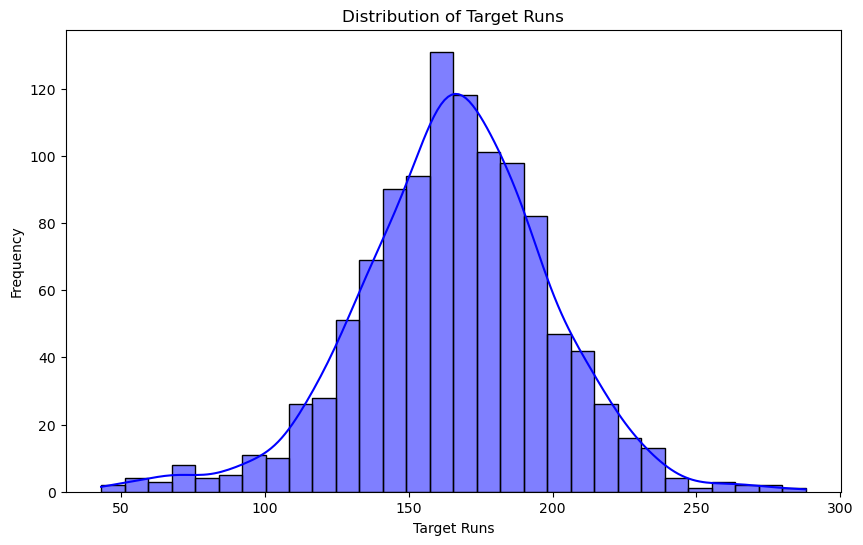

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(runs_data, bins=30, kde=True, color='blue')
plt.title("Distribution of Target Runs")
plt.xlabel("Target Runs")
plt.ylabel("Frequency")
plt.show()


In [20]:
wickets_data = data[data['result'] == 'wickets']['result_margin'].dropna()
wickets_mean = wickets_data.mean()
wickets_median = wickets_data.median()
wickets_mode = wickets_data.mode()[0] if not wickets_data.mode().empty else None




In [21]:
print(f"Mean (Average Wickets): {wickets_mean}")
print(f"Median (Middle Value): {wickets_median}")
print(f"Mode (Most Frequent): {wickets_mode}")


Mean (Average Wickets): 6.192041522491349
Median (Middle Value): 6.0
Mode (Most Frequent): 6.0


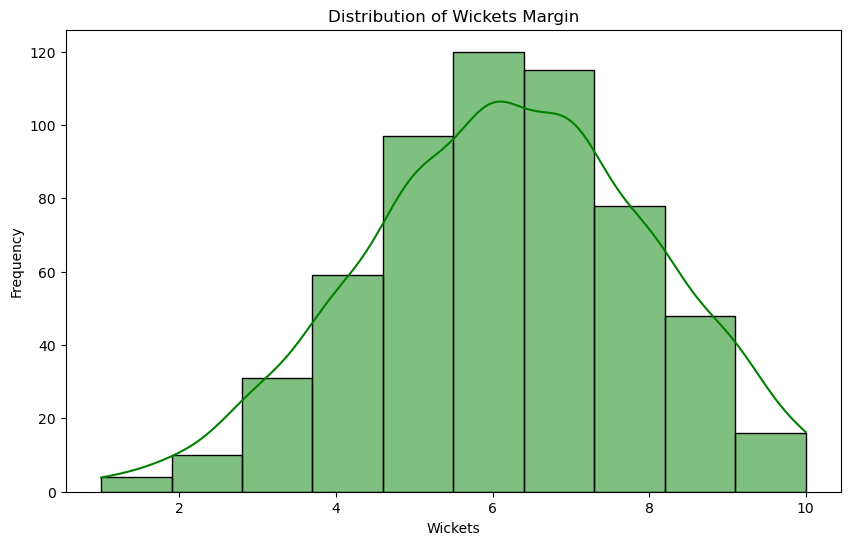

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(wickets_data, bins=10, kde=True, color='green')
plt.title("Distribution of Wickets Margin")
plt.xlabel("Wickets")
plt.ylabel("Frequency")
plt.show()


In [23]:

print("### Insights ###")
print("1. Runs Analysis:")
print(f"- Average runs targeted is around {runs_mean:.2f}.")
print(f"- Median value of runs indicates typical targets are around {runs_median}.")
print(f"- Mode shows that {runs_mode} is the most frequent target.")

print("\n2. Wickets Analysis:")
print(f"- Teams win by an average of {wickets_mean:.2f} wickets.")
print(f"- The median value suggests a common victory margin of {wickets_median} wickets.")
print(f"- Most frequent margin is {wickets_mode} wickets.")


### Insights ###
1. Runs Analysis:
- Average runs targeted is around 165.68.
- Median value of runs indicates typical targets are around 166.0.
- Mode shows that 166.0 is the most frequent target.

2. Wickets Analysis:
- Teams win by an average of 6.19 wickets.
- The median value suggests a common victory margin of 6.0 wickets.
- Most frequent margin is 6.0 wickets.
